In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("D:/ai/neural networks/water.csv")
data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [3]:
data.describe()

,X,Y
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


In [4]:

data.isnull().sum()

X    0
Y    0
dtype: int64

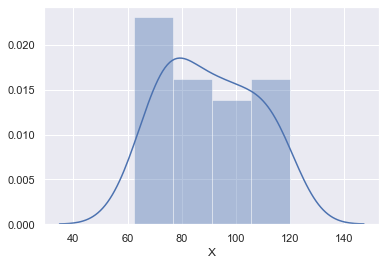

In [14]:
sns.set(style = 'darkgrid')
sns.distplot(data['X'])

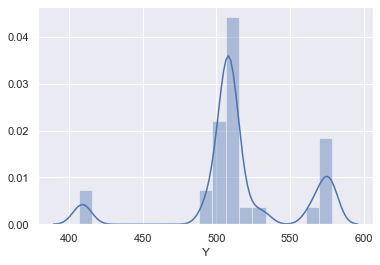

In [15]:
sns.set(style = 'darkgrid')
sns.distplot(data['Y'])

In [16]:
# Z-SCORE
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


In [17]:

threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


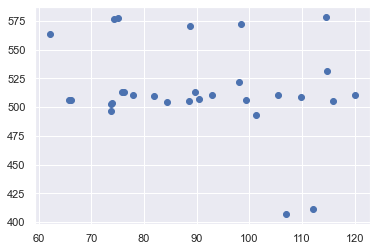

In [18]:
# Visualising data points using a Scatter plot
plt.scatter(data['X'],data['Y'])

In [19]:
# Implementing ITQ
r1 = data.quantile(0.25)
r3 = data.quantile(0.75)
sqr = r3 - r1
sqr

X    29.075
Y    14.600
dtype: float64

In [21]:
data_c = data[~((data < (r1 - 1.5 * sqr)) |(data > (r3 + 1.5 * sqr))).any(axis=1)]
data_c.shape


(22, 2)

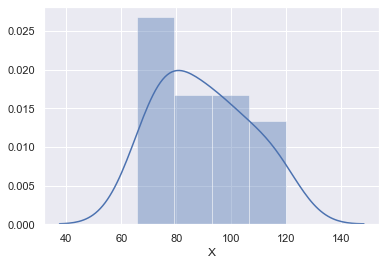

In [24]:
sns.set(style = 'darkgrid')
sns.distplot(data_c['X'])

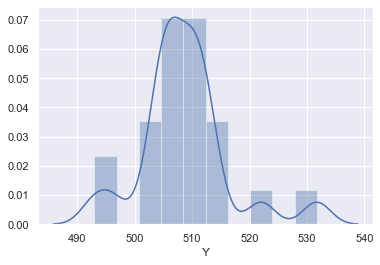

In [25]:
sns.set(style = 'darkgrid')
sns.distplot(data_c['Y'])

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
old_data = data.copy()
data = data_c.copy()

In [29]:
data_x = data['X']
data_y = data['Y']

# normalising the data
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x

data_x = np.array(data_x)
data_y = np.array(data_y)
datas =[]
for i in range(len(data_x)):
  datas.append([data_x[i],data_y[i]])

datas[1:10]

[[0.45672191528545114, 0.364341085271318],
 [0.14917127071823194, 0.08785529715762205],
 [0.9226519337016574, 0.31524547803617503],
 [0.6206261510128914, 0.3462532299741592],
 [0.5027624309392265, 0.44444444444444364],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.009208103130755065, 0.34366925064599474],
 [0.22467771639042364, 0.44444444444444364]]

In [30]:
data_train,data_test = train_test_split(datas,test_size=0.1)

In [32]:
#training the model

In [36]:
df = pd.DataFrame(data=data_train)

In [37]:
df

,0,1
0,0.000000,0.341085
1,0.149171,0.087855
2,0.342541,0.291990
3,0.224678,0.444444
4,0.812155,0.403101
5,0.151013,0.281654
6,0.193370,0.527132
7,0.009208,0.343669
8,0.502762,0.444444
9,0.620626,0.346253


In [38]:
ns = df.shape[0]
ns

19

In [39]:
df[0][1]

0.14917127071823194

In [51]:
#intialization
n=0.1
i=0 
epochs=5000
m=1
c=-1

while i<epochs:
    dm=0
    dc=0
    for j in range(0,ns):
        dm=dm+(df[1][j]-m*df[0][j]-c)*(df[0][j])
        dc=dc+(df[1][j]-m*df[0][j]-c)
        dm = (-1)*(1/ns)*dm
        dc = (-1)*(1/ns)*dc
        ddm=(-1)*n*dm
        ddc=(-1)*n*dc
        m=m+ddm
        c=c+ddc
        i=i+1
        
    
  
print(m,c)

0.3965039363172913 0.21777719398955012


In [52]:
df['yp']=np.nan

In [53]:
for i in range(0,ns):
    df['yp'][i]=m*df[0][i]+c


In [54]:
df

,0,1,yp
0,0.000000,0.341085,0.217777
1,0.149171,0.087855,0.276924
2,0.342541,0.291990,0.353596
3,0.224678,0.444444,0.306863
4,0.812155,0.403101,0.539800
5,0.151013,0.281654,0.277654
6,0.193370,0.527132,0.294449
7,0.009208,0.343669,0.221428
8,0.502762,0.444444,0.417124
9,0.620626,0.346253,0.463858


In [44]:
mse = 0
for i in range(0,ns):
  mse += (df[1][i] -df['yp'][i])**2
mse = mse/ns
mse

0.03951072771373009

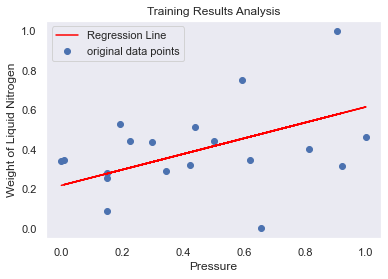

In [57]:
plt.plot(df[0],df['yp'],'red',label="Regression Line")
plt.scatter(df[0],df[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [58]:
min_x = old_data['X'].min()
max_x = old_data['X'].max()
min_y = old_data['Y'].min()
max_y = old_data['Y'].max()
print(min_x,min_y,max_x,max_y)

62.2 406.7 120.0 578.6


In [62]:
x = float(input("enter pressure"))
x = (x - min_x)/(max_x - min_x)
y = m*x + c
y = (y)*(max_y - min_y) + min_y
y

enter pressure93


480.4559346106553